In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
#import scipy.stats as stats


Using TensorFlow backend.


In [2]:
df=pd.read_csv('data (2).csv',index_col=0).drop(columns=['AreaItem','PurposeItem','BuildPurpose','MaterialItem','BuildType','BuildLayer','RecStat',  'SameAprvSeq','HavePlan'])
#df.head()#'RecStat','SameAprvSeq','HavePlan'
#df.drop("ID", axis = 1, inplace = True)

In [3]:
len(df),print(df.dtypes),df.shape
df.corr()

CityItem              object
BuildMaterial         object
PublicArea           float64
BuildComDate          object
AplraiseUnitValue    float64
Item                  object
AdjBuildArea         float64
AplraiseValue        float64
DebtPerc             float64
dtype: object


,PublicArea,AplraiseUnitValue,AdjBuildArea,AplraiseValue,DebtPerc
PublicArea,1.000000,-0.024707,-0.084853,0.993195,0.056236
AplraiseUnitValue,-0.024707,1.000000,-0.126460,0.434808,-0.116384
AdjBuildArea,-0.084853,-0.126460,1.000000,-0.043643,-0.031058
AplraiseValue,0.993195,0.434808,-0.043643,1.000000,0.014962
DebtPerc,0.056236,-0.116384,-0.031058,0.014962,1.000000


In [4]:
df = df.drop(df[(df['AplraiseValue']==0)].index)
print(df.shape)
df = df.drop(df[(df['AplraiseUnitValue']==0)].index)

#df = df.drop(df[(df['AplraiseValue']>100000000)].index)

df.dropna(subset=['AplraiseValue'],inplace=True) #df.drop(3252,inplace=True)
#df['AplraiseValue']=df['AplraiseValue'].astype('int64')
print(df.shape)
df['AplraiseValue']=df['AplraiseValue'].astype(int)

(3865, 9)
(3744, 9)


In [60]:
df['AplraiseValue']

ID
1       10782800
2        4914800
3       16726000
4       29172600
5        8652000
          ...   
3864     2058200
3865     4547420
3866     4547420
3867     3523100
3868     3214950
Name: AplraiseValue, Length: 3714, dtype: int32

這張圖說明他的峰值很高,為一個常態分佈，且為右偏
y軸為發商機率,x軸為price
 AxesSubplot(0.125,0.125;0.775x0.755)


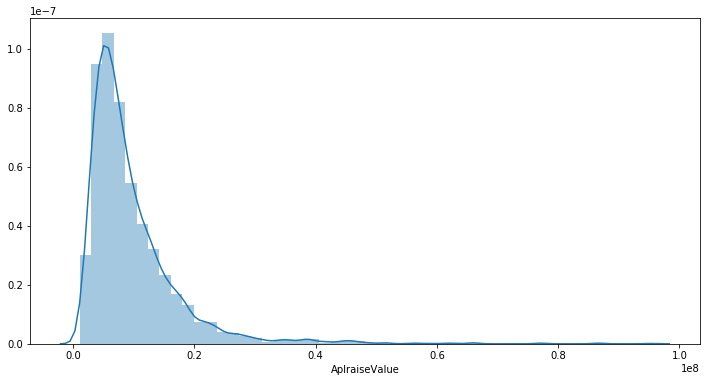

In [61]:
import seaborn as sns
plt.figure(figsize=(12, 6))#set size 
print('這張圖說明他的峰值很高,為一個常態分佈，且為右偏\ny軸為發商機率,x軸為price\n',sns.distplot(df['AplraiseValue']))

o is outlier , greenSpot is mean


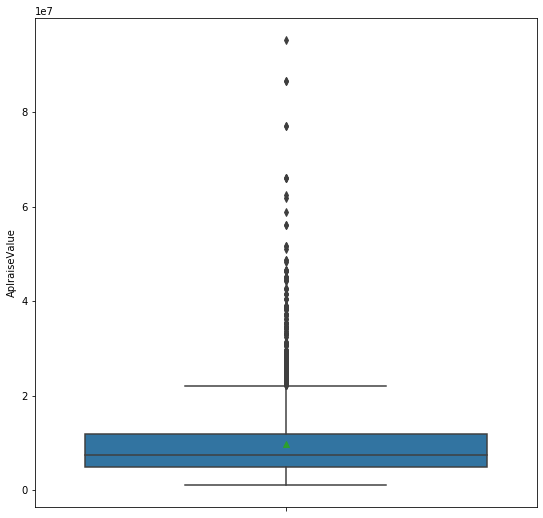

In [62]:
plt.figure(figsize=(9,9))
sns.boxplot(df['AplraiseValue'],showmeans=True,orient='v')
print('o is outlier , greenSpot is mean')
plt.show()

In [6]:
y_train= np.log(df['AplraiseValue'].values+1)
#y_train=df['AplraiseValue']
df.drop(['AplraiseValue'], axis=1, inplace=True)
y_train
print(df.shape)

(3744, 8)


In [7]:

df['PublicArea']=df['PublicArea'].fillna(0)
df['AdjBuildArea']=df['AdjBuildArea'].fillna(0)

df['Item']=df['Item'].fillna('其他').astype(str)
#df['CityItem']=df['CityItem'].astype(str)
#df['BuildType']=df['BuildType'].astype(str)
#len(df)
#print(df.dtypes)
df

,CityItem,BuildMaterial,PublicArea,BuildComDate,AplraiseUnitValue,Item,AdjBuildArea,DebtPerc
ID,,,,,,,,
1,新北市,04,16.23,1999/11/15 上午 12:00:00,280000.0,陽台,3.05,48.0
2,新北市,08,0.00,1968/2/1 上午 12:00:00,220000.0,其他,0.00,37.0
3,新北市,04,28.99,1993/8/3 上午 12:00:00,290000.0,陽台,2.84,25.0
4,新北市,04,31.11,2012/1/18 上午 12:00:00,380000.0,其他,6.62,38.0
5,新北市,04,7.07,1996/12/4 上午 12:00:00,280000.0,陽台,2.83,8.0
...,...,...,...,...,...,...,...,...
3864,高雄市,08,0.00,1969/5/15 上午 12:00:00,12000.0,其他,0.00,59.0
3865,高雄市,08,0.00,1981/8/15 上午 12:00:00,17000.0,其他,0.00,56.0
3866,高雄市,08,0.00,1981/8/15 上午 12:00:00,17000.0,其他,0.00,56.0


In [8]:

def dateToInteger(dateStr):
    dateStr=dateStr.split()[0].split()[0].split('/')#yyyy/m/d
    if len(dateStr[1])!=2:
        dateStr[1]="0"+dateStr[1]
    if len(dateStr[2])!=2:
        dateStr[2]="0"+dateStr[2]
    return int(dateStr[0]+dateStr[1]+dateStr[2])
#print(dateToInteger('1999/11/15 上午 12:00:00'))
#print(len(df['BuildComDate']))
#,i in range(len(df['BuildComDate']))
for i in df.index:
    df['BuildComDate'][i]=dateToInteger(df['BuildComDate'][i])
    #print(i,df['BuildComDate'][i])
df['BuildComDate']=df['BuildComDate'].astype('int64')
#df['BuildComDate'][3251]=dateToInteger(df['BuildComDate'][3251])'''

#range(len(df['BuildComDate']))

C:\Users\User\Anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [9]:
df=df.reset_index(drop=True)
df

,CityItem,BuildMaterial,PublicArea,BuildComDate,AplraiseUnitValue,Item,AdjBuildArea,DebtPerc
0,新北市,04,16.23,19991115,280000.0,陽台,3.05,48.0
1,新北市,08,0.00,19680201,220000.0,其他,0.00,37.0
2,新北市,04,28.99,19930803,290000.0,陽台,2.84,25.0
3,新北市,04,31.11,20120118,380000.0,其他,6.62,38.0
4,新北市,04,7.07,19961204,280000.0,陽台,2.83,8.0
...,...,...,...,...,...,...,...,...
3739,高雄市,08,0.00,19690515,12000.0,其他,0.00,59.0
3740,高雄市,08,0.00,19810815,17000.0,其他,0.00,56.0
3741,高雄市,08,0.00,19810815,17000.0,其他,0.00,56.0
3742,高雄市,08,0.00,19731015,10000.0,其他,0.00,31.0


In [10]:
df.head()

,CityItem,BuildMaterial,PublicArea,BuildComDate,AplraiseUnitValue,Item,AdjBuildArea,DebtPerc
0,新北市,04,16.23,19991115,280000.0,陽台,3.05,48.0
1,新北市,08,0.00,19680201,220000.0,其他,0.00,37.0
2,新北市,04,28.99,19930803,290000.0,陽台,2.84,25.0
3,新北市,04,31.11,20120118,380000.0,其他,6.62,38.0
4,新北市,04,7.07,19961204,280000.0,陽台,2.83,8.0


In [12]:
train_df=pd.get_dummies(df)
print(df.shape,train_df.shape)
print(df.shape,train_df.shape)
train_df.head()


(3744, 8) (3744, 34)
(3744, 8) (3744, 34)


,PublicArea,BuildComDate,AplraiseUnitValue,AdjBuildArea,DebtPerc,CityItem_南投縣,CityItem_台中市,CityItem_台北市,CityItem_台南市,CityItem_嘉義市,...,BuildMaterial_06,BuildMaterial_08,BuildMaterial_10,BuildMaterial_11,BuildMaterial_12,BuildMaterial_Z,Item_其他,Item_花台,Item_陽台,Item_露台
0,16.23,19991115,280000.0,3.05,48.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.00,19680201,220000.0,0.00,37.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,28.99,19930803,290000.0,2.84,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,31.11,20120118,380000.0,6.62,38.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,7.07,19961204,280000.0,2.83,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y_train, test_size=0.33, random_state=1)

In [14]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics=['mean_absolute_error'])
    return model

In [ ]:
model = create_model()
model.summary()

In [37]:
model = create_model()

Train on 2508 samples, validate on 1236 samples
Epoch 1/1
2508/2508 [==============================] - 1s 216us/step - loss: 42250532228.3466 - mean_absolute_error: 38863.0781 - val_loss: 252.3747 - val_mean_absolute_error: 15.8692


In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=32)#,callbacks=[reduce_lr])
loss,acc = model.evaluate(X_test, y_test, verbose=0)

Train on 2508 samples, validate on 1236 samples
Epoch 1/150
2508/2508 [==============================] - 0s 131us/step - loss: 253.9377 - mean_absolute_error: 15.9173 - val_loss: 253.6270 - val_mean_absolute_error: 15.9086
Epoch 2/150
2508/2508 [==============================] - 0s 127us/step - loss: 253.9367 - mean_absolute_error: 15.9173 - val_loss: 253.6258 - val_mean_absolute_error: 15.9086
Epoch 3/150
2508/2508 [==============================] - 0s 133us/step - loss: 253.9354 - mean_absolute_error: 15.9173 - val_loss: 253.6244 - val_mean_absolute_error: 15.9086
Epoch 4/150
2508/2508 [==============================] - 0s 126us/step - loss: 253.9339 - mean_absolute_error: 15.9172 - val_loss: 253.6227 - val_mean_absolute_error: 15.9085
Epoch 5/150
2508/2508 [==============================] - 0s 126us/step - loss: 253.9321 - mean_absolute_error: 15.9172 - val_loss: 253.6209 - val_mean_absolute_error: 15.9084
Epoch 6/150
2508/2508 [==============================] - 0s 127us/step - loss

2508/2508 [==============================] - 0s 127us/step - loss: 252.6665 - mean_absolute_error: 15.8773 - val_loss: 252.3356 - val_mean_absolute_error: 15.8680
Epoch 94/150
2508/2508 [==============================] - 0s 126us/step - loss: 252.6242 - mean_absolute_error: 15.8760 - val_loss: 252.2925 - val_mean_absolute_error: 15.8666
Epoch 95/150
2508/2508 [==============================] - 0s 126us/step - loss: 252.5802 - mean_absolute_error: 15.8746 - val_loss: 252.2477 - val_mean_absolute_error: 15.8652
Epoch 96/150
2508/2508 [==============================] - 0s 126us/step - loss: 252.5345 - mean_absolute_error: 15.8732 - val_loss: 252.2010 - val_mean_absolute_error: 15.8638
Epoch 97/150
2508/2508 [==============================] - 0s 126us/step - loss: 252.4869 - mean_absolute_error: 15.8717 - val_loss: 252.1525 - val_mean_absolute_error: 15.8622
Epoch 98/150
2508/2508 [==============================] - 0s 127us/step - loss: 252.4374 - mean_absolute_error: 15.8701 - val_loss: 2

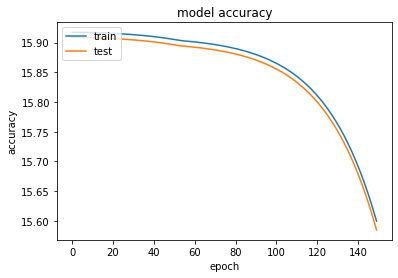

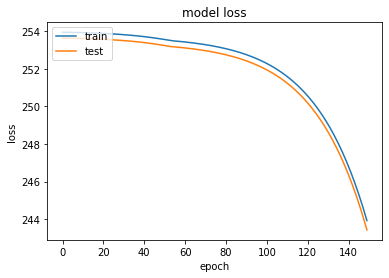

Test loss: 243.43087022898652
Test MAE: 15.584881782531738


In [28]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
loss,acc = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', loss)
print('Test MAE:', acc)

In [122]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.2,min_lr=0.00001)
# Available metrics are: val_loss,val_mean_absolute_error,loss,mean_absolute_error,lr

In [41]:
prediction = model.predict(train_df.head(5))
#print(prediction)
answer=np.expm1(prediction)
print(answer)
np.expm1(prediction)
predict10 = pd.DataFrame()
predict10['Id'] = [1,2,3,4,5]
predict10['SalePrice'] = np.expm1(prediction)
predict10

[[0.02555127]
 [0.02555127]
 [0.02555127]
 [0.02555127]
 [0.02555127]]


,Id,SalePrice
0,1,0.025551
1,2,0.025551
2,3,0.025551
3,4,0.025551
4,5,0.025551


In [26]:
#!pip install h5py

In [29]:
#model.save('my_model.h5') 
#del model
from keras.models import load_model
model = load_model('my_model.h5')

In [18]:
import random

In [13]:
print(random.randint(1,2),len(df))

1 3744


In [32]:
pick10=random.sample(range(0,len(df)),10)
pick10

[1099, 3709, 276, 2467, 3243, 235, 1523, 3633, 1834, 2312]

In [15]:
for i in pick10:
    print(train_df.index[i])

3598
1590
475
188
2680
1328
2743
3457
1404
3276


In [41]:
type(train_df.iloc[0])

pandas.core.series.Series

In [33]:
getTestData=[]
for i in pick10:
    getTestData.append(train_df.iloc[i])

In [44]:
print(train_df.index.name)

None


In [53]:
train_df.iloc[2]

PublicArea                 28.99
BuildComDate         19930803.00
AplraiseUnitValue      290000.00
AdjBuildArea                2.84
AplraiseValue        16726000.00
                        ...     
BuildType_R6                0.00
Item_其他                     0.00
Item_花台                     0.00
Item_陽台                     1.00
Item_露台                     0.00
Name: 2, Length: 224, dtype: float64

In [34]:
record=pd.DataFrame(getTestData,index=pick10,columns=train_df.columns)
record,type(record),record.shape

(      PublicArea  BuildComDate  AplraiseUnitValue  AdjBuildArea  DebtPerc  \
 1099        0.00    19870421.0            20000.0         12.34      66.0   
 3709        0.00    19880901.0            25000.0          0.00      60.0   
 276         0.00    19770718.0           290000.0          0.00      10.0   
 2467        0.00    20060210.0            43000.0          8.36       9.0   
 3243        9.12    19940208.0           115000.0          3.15      25.0   
 235         2.22    19890607.0           250000.0          2.39      60.0   
 1523        0.00    20020404.0            36000.0          5.84      62.0   
 3633       12.87    19940723.0            50000.0          0.89      61.0   
 1834       20.58    20090813.0           305000.0          3.36      75.0   
 2312        5.18    19940601.0            96000.0          3.38      70.0   
 
       BuildPurpose_A  BuildPurpose_B  BuildPurpose_C  BuildPurpose_E  \
 1099             1.0             0.0             0.0             0

In [1]:
prediction = model.predict(train_df.head(200))
prediction

NameError: name 'model' is not defined

In [64]:
predict10 = pd.DataFrame()
predict10['Id'] = pick10
predict10['SalePrice'] = np.expm1(prediction)

In [59]:
predict10

,Id,SalePrice
0,225,8092330.0
1,312,8092330.0
2,2696,8092330.0
3,3333,8092330.0
4,361,8092330.0
5,3558,8092330.0
6,2721,8092330.0
7,1308,8092330.0
8,1185,8092330.0
9,2888,8092330.0
